In [58]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
import numpy as np
import seaborn as sns


In [59]:
solicitacoes_credito = pd.read_pickle('saidas/solicitacoes_credito_tratado.pkl')

In [60]:
solicitacoes_credito.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4538 entries, 4 to 8963
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  4538 non-null   int64  
 1   prazoMedioRecebimentoVendas  4538 non-null   int64  
 2   titulosEmAberto              4538 non-null   float64
 3   valorSolicitado              4538 non-null   float64
 4   status                       4538 non-null   object 
 5   valorAprovado                4538 non-null   float64
 6   periodoBalanco               4538 non-null   object 
 7   ativoCirculante              4538 non-null   float64
 8   passivoCirculante            4538 non-null   float64
 9   totalAtivo                   4538 non-null   float64
 10  totalPatrimonioLiquido       4538 non-null   float64
 11  endividamento                4538 non-null   float64
 12  duplicatasAReceber           4538 non-null   float64
 13  estoque                

In [61]:
solicitacoes_credito2 = solicitacoes_credito
solicitacoes_credito2.head(2)

,maiorAtraso,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,valorAprovado,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,...,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,custos,intervaloFundacao,capitalSocial,limiteEmpresaAnaliseCredito,score_atraso
4,20,20,1486.95,50000.0,AprovadoAnalista,50000.0,2019-09-30T00:00:00,14758917.0,12149031.0,25793410.0,...,3039112.0,11797928.0,3047791.0,40779757.0,81459809.0,40680051.0,Acima de 17 anos,75000.0,89000.0,0.979529
7,4,102,208980.00,300000.0,AprovadoAnalista,300000.0,2019-09-30T03:00:00,17801610.0,2538069.0,19415777.0,...,0.0,3742963.0,11902384.0,11958227.0,9357949.0,0.0,Acima de 17 anos,120000.0,768233.0,0.995906


In [62]:
label_encoder_status = LabelEncoder()
label_encoder_periodoBalanco = LabelEncoder()
label_encoder_intervaloFundacao = LabelEncoder()

# Aplicando fit_transform para codificar
solicitacoes_credito2['status'] = label_encoder_status.fit_transform(solicitacoes_credito2['status'])
solicitacoes_credito2['periodoBalanco'] = label_encoder_periodoBalanco.fit_transform(solicitacoes_credito2['periodoBalanco'])
solicitacoes_credito2['intervaloFundacao'] = label_encoder_intervaloFundacao.fit_transform(solicitacoes_credito2['intervaloFundacao'])

solicitacoes_credito2.head(2)

,maiorAtraso,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,valorAprovado,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,...,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,custos,intervaloFundacao,capitalSocial,limiteEmpresaAnaliseCredito,score_atraso
4,20,20,1486.95,50000.0,1,50000.0,51,14758917.0,12149031.0,25793410.0,...,3039112.0,11797928.0,3047791.0,40779757.0,81459809.0,40680051.0,0,75000.0,89000.0,0.979529
7,4,102,208980.00,300000.0,1,300000.0,52,17801610.0,2538069.0,19415777.0,...,0.0,3742963.0,11902384.0,11958227.0,9357949.0,0.0,0,120000.0,768233.0,0.995906


In [63]:
# Descobrindo qual o melhor numero de clusters(cotovelo)
distorcions = []
n_clusters = range(2, 15)
for n_cluster2 in n_clusters:
    print(n_cluster2)
    distorcions.append(KMeans(n_clusters=n_cluster2, max_iter=10_000, n_init=100, random_state=61658).fit(solicitacoes_credito2).inertia_)


2


3
4
5
6
7
8
9
10
11
12
13
14


<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

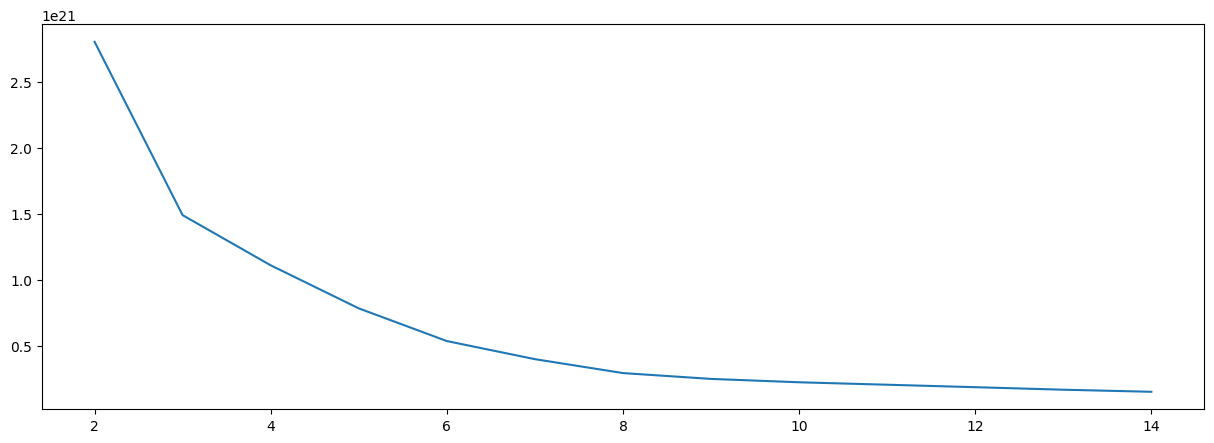

In [64]:
plt.figure(figsize=(15,5))
plt.plot(n_clusters, distorcions)
plt.grid
# Aqui, consideramos o ultimo "cotovelo" que no caso é o 4

In [65]:
# Clusterização

km = KMeans(n_clusters=4, max_iter=10_000, n_init=100, random_state=61658)
X_t = km.fit_predict(solicitacoes_credito2)
X_t

# --------------------------------

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [66]:
solicitacoes_credito_saida = solicitacoes_credito2
solicitacoes_credito_saida.loc[:, 'cluster'] = X_t
# solicitacoes_credito_saida.to_excel('saidas/solicitacoes_credito_encoded.xlsx')
solicitacoes_credito_saida

,maiorAtraso,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,valorAprovado,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,...,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,custos,intervaloFundacao,capitalSocial,limiteEmpresaAnaliseCredito,score_atraso,cluster
4,20,20,1486.95,50000.0,1,50000.0,51,14758917.0,12149031.0,25793410.0,...,11797928.0,3047791.0,40779757.0,81459809.0,40680051.0,0,75000.0,89000.0,0.979529,0
7,4,102,208980.00,300000.0,1,300000.0,52,17801610.0,2538069.0,19415777.0,...,3742963.0,11902384.0,11958227.0,9357949.0,0.0,0,120000.0,768233.0,0.995906,0
8,43,27,6432.00,400000.0,1,400000.0,27,36827690.0,13843198.0,39455945.0,...,15980275.0,11420388.0,72479551.0,6233236.0,-49267738.0,0,1000000.0,6910219.0,0.955988,0
10,7,0,0.00,1000000.0,1,800000.0,42,2127907.0,704245.0,3609498.0,...,973971.0,942096.0,4575646.0,296634.0,-3299332.0,3,20000.0,81000.0,0.992835,0
11,26,0,0.00,200000.0,2,50000.0,27,5369982.0,6118711.0,5595689.0,...,115000.0,1693990.0,13871246.0,-772398.0,-9455401.0,2,600000.0,183509.0,0.973388,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8958,4,28,6804.00,1500000.0,1,1500000.0,65,20070708.0,18164050.0,20290799.0,...,11285664.0,5718842.0,133280394.0,44612644.0,88667750.0,2,833345.0,7200000.0,0.995906,0
8959,18,44,90290.90,250000.0,5,0.0,120,4943835.0,4025065.0,5633038.0,...,3471368.0,1316604.0,4887005.0,2322234.0,2564771.0,2,30000.0,60000.0,0.981576,0
8960,0,0,0.00,20000.0,1,20000.0,64,0.0,0.0,0.0,...,0.0,0.0,5392166.0,246578.0,5145588.0,1,110000.0,3240.0,1.000000,0
8961,64,64,1276462.66,1800000.0,1,1800000.0,115,38305921.0,15063464.0,40876769.0,...,15784605.0,15243870.0,119702196.0,38587967.0,81114229.0,0,2000000.0,10833160.0,0.934493,0


In [67]:
solicitacoes_credito2['status2'] = label_encoder_status.inverse_transform(solicitacoes_credito2['status'])
solicitacoes_credito2['periodoBalanco2'] = label_encoder_periodoBalanco.inverse_transform(solicitacoes_credito2['periodoBalanco'])
solicitacoes_credito2['intervaloFundacao2'] = label_encoder_intervaloFundacao.inverse_transform(solicitacoes_credito2['intervaloFundacao'])


In [68]:
solicitacoes_credito2.head(2)

,maiorAtraso,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,valorAprovado,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,...,margemBruta,custos,intervaloFundacao,capitalSocial,limiteEmpresaAnaliseCredito,score_atraso,cluster,status2,periodoBalanco2,intervaloFundacao2
4,20,20,1486.95,50000.0,1,50000.0,51,14758917.0,12149031.0,25793410.0,...,81459809.0,40680051.0,0,75000.0,89000.0,0.979529,0,AprovadoAnalista,2019-09-30T00:00:00,Acima de 17 anos
7,4,102,208980.00,300000.0,1,300000.0,52,17801610.0,2538069.0,19415777.0,...,9357949.0,0.0,0,120000.0,768233.0,0.995906,0,AprovadoAnalista,2019-09-30T03:00:00,Acima de 17 anos


In [69]:
solicitacoes_credito2.loc[:, 'cluster'] = X_t

In [70]:

solicitacoes_credito3 = solicitacoes_credito2[solicitacoes_credito2['cluster'].isin([2, 5, 6, 4])]

In [71]:
solicitacoes_credito3.head()

,maiorAtraso,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,valorAprovado,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,...,margemBruta,custos,intervaloFundacao,capitalSocial,limiteEmpresaAnaliseCredito,score_atraso,cluster,status2,periodoBalanco2,intervaloFundacao2
295,16,0,0.00,100000.0,2,100000.0,27,1.334726e+09,1.030495e+09,1.776012e+09,...,0.000000e+00,0.000000e+00,0,330742994.0,0.0,0.983623,2,AprovadoComite,2018-12-31T02:00:00,Acima de 17 anos
296,17,0,0.00,400000.0,2,400000.0,27,1.334726e+09,1.030495e+09,1.776012e+09,...,0.000000e+00,0.000000e+00,0,330742994.0,0.0,0.982600,2,AprovadoComite,2018-12-31T02:00:00,Acima de 17 anos
409,0,64,5400.00,5000.0,1,5000.0,26,2.490038e+09,4.575015e+08,3.698216e+09,...,1.373143e+09,7.982745e+08,0,900000000.0,128430684.0,1.000000,2,AprovadoAnalista,2018-12-31T00:00:00,Acima de 17 anos
438,25,0,27856.00,400000.0,1,400000.0,65,9.497130e+08,3.341210e+08,1.107920e+09,...,6.905890e+08,1.600877e+06,0,3830000.0,248312960.0,0.974411,2,AprovadoAnalista,2019-12-31T03:00:00,Acima de 17 anos
944,19,54,820167.46,300000.0,2,300000.0,27,3.355186e+08,2.989122e+08,4.427892e+08,...,3.762784e+08,1.038190e+09,0,10000000.0,0.0,0.980553,2,AprovadoComite,2018-12-31T02:00:00,Acima de 17 anos


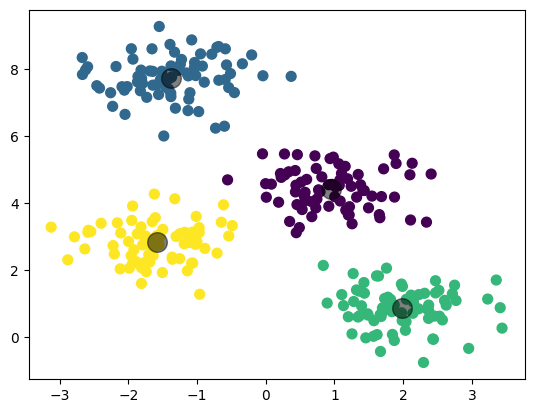

In [72]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);



In [73]:
solicitacoes_credito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4538 entries, 4 to 8963
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  4538 non-null   int64  
 1   prazoMedioRecebimentoVendas  4538 non-null   int64  
 2   titulosEmAberto              4538 non-null   float64
 3   valorSolicitado              4538 non-null   float64
 4   status                       4538 non-null   int32  
 5   valorAprovado                4538 non-null   float64
 6   periodoBalanco               4538 non-null   int32  
 7   ativoCirculante              4538 non-null   float64
 8   passivoCirculante            4538 non-null   float64
 9   totalAtivo                   4538 non-null   float64
 10  totalPatrimonioLiquido       4538 non-null   float64
 11  endividamento                4538 non-null   float64
 12  duplicatasAReceber           4538 non-null   float64
 13  estoque                

In [74]:
solicitacoes_credito2['status'] = label_encoder_status.inverse_transform(solicitacoes_credito2['status'])
solicitacoes_credito2['periodoBalanco'] = label_encoder_periodoBalanco.inverse_transform(solicitacoes_credito2['periodoBalanco'])
solicitacoes_credito2['intervaloFundacao'] = label_encoder_intervaloFundacao.inverse_transform(solicitacoes_credito2['intervaloFundacao'])

In [75]:
solicitacoes_credito_encoder = solicitacoes_credito2

In [76]:
solicitacoes_credito2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4538 entries, 4 to 8963
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  4538 non-null   int64  
 1   prazoMedioRecebimentoVendas  4538 non-null   int64  
 2   titulosEmAberto              4538 non-null   float64
 3   valorSolicitado              4538 non-null   float64
 4   status                       4538 non-null   object 
 5   valorAprovado                4538 non-null   float64
 6   periodoBalanco               4538 non-null   object 
 7   ativoCirculante              4538 non-null   float64
 8   passivoCirculante            4538 non-null   float64
 9   totalAtivo                   4538 non-null   float64
 10  totalPatrimonioLiquido       4538 non-null   float64
 11  endividamento                4538 non-null   float64
 12  duplicatasAReceber           4538 non-null   float64
 13  estoque                

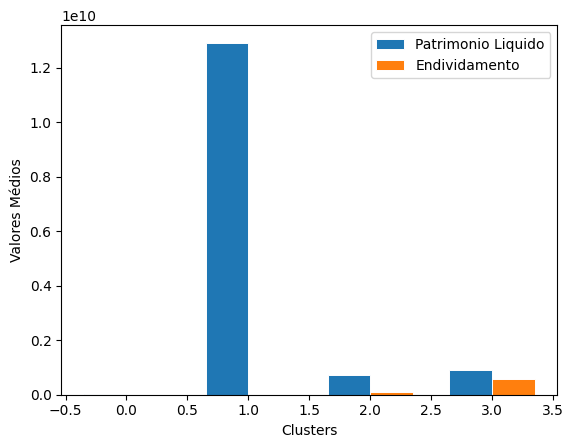

In [77]:
# Agrupar pelo campo 'cluster' e calcular a média de 'patrimonio' e 'endividamento'
media_patrimonio_endividamento = solicitacoes_credito.groupby('cluster')[['totalPatrimonioLiquido', 'endividamento']].mean()

# Definir a largura de cada barra
largura_barra = 0.35
clusters = media_patrimonio_endividamento.index

# Criar subgráficos para patrimônio e endividamento lado a lado
fig, ax = plt.subplots()

# Barras para o patrimônio
ax.bar(clusters - largura_barra/2, media_patrimonio_endividamento['totalPatrimonioLiquido'], width=largura_barra, label='Patrimonio Liquido', edgecolor="white", linewidth=0.7)

# Barras para o endividamento
ax.bar(clusters + largura_barra/2, media_patrimonio_endividamento['endividamento'], width=largura_barra, label='Endividamento', edgecolor="white", linewidth=0.7)

# Configurações do gráfico
ax.set_xlabel('Clusters')
ax.set_ylabel('Valores Médios')

ax.legend()

# Exibir gráfico
plt.show()


In [78]:
solicitacoes_credito.head(2)

,maiorAtraso,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,valorAprovado,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,...,margemBruta,custos,intervaloFundacao,capitalSocial,limiteEmpresaAnaliseCredito,score_atraso,cluster,status2,periodoBalanco2,intervaloFundacao2
4,20,20,1486.95,50000.0,AprovadoAnalista,50000.0,2019-09-30T00:00:00,14758917.0,12149031.0,25793410.0,...,81459809.0,40680051.0,Acima de 17 anos,75000.0,89000.0,0.979529,0,AprovadoAnalista,2019-09-30T00:00:00,Acima de 17 anos
7,4,102,208980.00,300000.0,AprovadoAnalista,300000.0,2019-09-30T03:00:00,17801610.0,2538069.0,19415777.0,...,9357949.0,0.0,Acima de 17 anos,120000.0,768233.0,0.995906,0,AprovadoAnalista,2019-09-30T03:00:00,Acima de 17 anos


In [79]:
solicitacoes_credito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4538 entries, 4 to 8963
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  4538 non-null   int64  
 1   prazoMedioRecebimentoVendas  4538 non-null   int64  
 2   titulosEmAberto              4538 non-null   float64
 3   valorSolicitado              4538 non-null   float64
 4   status                       4538 non-null   object 
 5   valorAprovado                4538 non-null   float64
 6   periodoBalanco               4538 non-null   object 
 7   ativoCirculante              4538 non-null   float64
 8   passivoCirculante            4538 non-null   float64
 9   totalAtivo                   4538 non-null   float64
 10  totalPatrimonioLiquido       4538 non-null   float64
 11  endividamento                4538 non-null   float64
 12  duplicatasAReceber           4538 non-null   float64
 13  estoque                

In [80]:
# Remover os clusters 2, 5, 6 e 4 em uma única operação
# Excluir linhas onde o valor da coluna 'cluster' é 2, 5, 6 ou 4
# solicitacoes_credito4 = solicitacoes_credito[~solicitacoes_credito['cluster'].isin([2, 5, 6, 4])]

solicitacoes_credito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4538 entries, 4 to 8963
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  4538 non-null   int64  
 1   prazoMedioRecebimentoVendas  4538 non-null   int64  
 2   titulosEmAberto              4538 non-null   float64
 3   valorSolicitado              4538 non-null   float64
 4   status                       4538 non-null   object 
 5   valorAprovado                4538 non-null   float64
 6   periodoBalanco               4538 non-null   object 
 7   ativoCirculante              4538 non-null   float64
 8   passivoCirculante            4538 non-null   float64
 9   totalAtivo                   4538 non-null   float64
 10  totalPatrimonioLiquido       4538 non-null   float64
 11  endividamento                4538 non-null   float64
 12  duplicatasAReceber           4538 non-null   float64
 13  estoque                

In [81]:
# solicitacoes_credito = solicitacoes_credito.drop(['status2', 'periodoBalanco2', 'intervaloFundacao2'])

In [82]:
solicitacoes_credito.to_pickle('saidas/solicitacoes_credito_clusters.pkl')

In [83]:
solicitacoes_credito.to_excel('saidas/solicitacoes_credito_clusters.xlsx')

In [84]:
print(solicitacoes_credito.columns)

Index(['maiorAtraso', 'prazoMedioRecebimentoVendas', 'titulosEmAberto',
       'valorSolicitado', 'status', 'valorAprovado', 'periodoBalanco',
       'ativoCirculante', 'passivoCirculante', 'totalAtivo',
       'totalPatrimonioLiquido', 'endividamento', 'duplicatasAReceber',
       'estoque', 'faturamentoBruto', 'margemBruta', 'custos',
       'intervaloFundacao', 'capitalSocial', 'limiteEmpresaAnaliseCredito',
       'score_atraso', 'cluster', 'status2', 'periodoBalanco2',
       'intervaloFundacao2'],
      dtype='object')


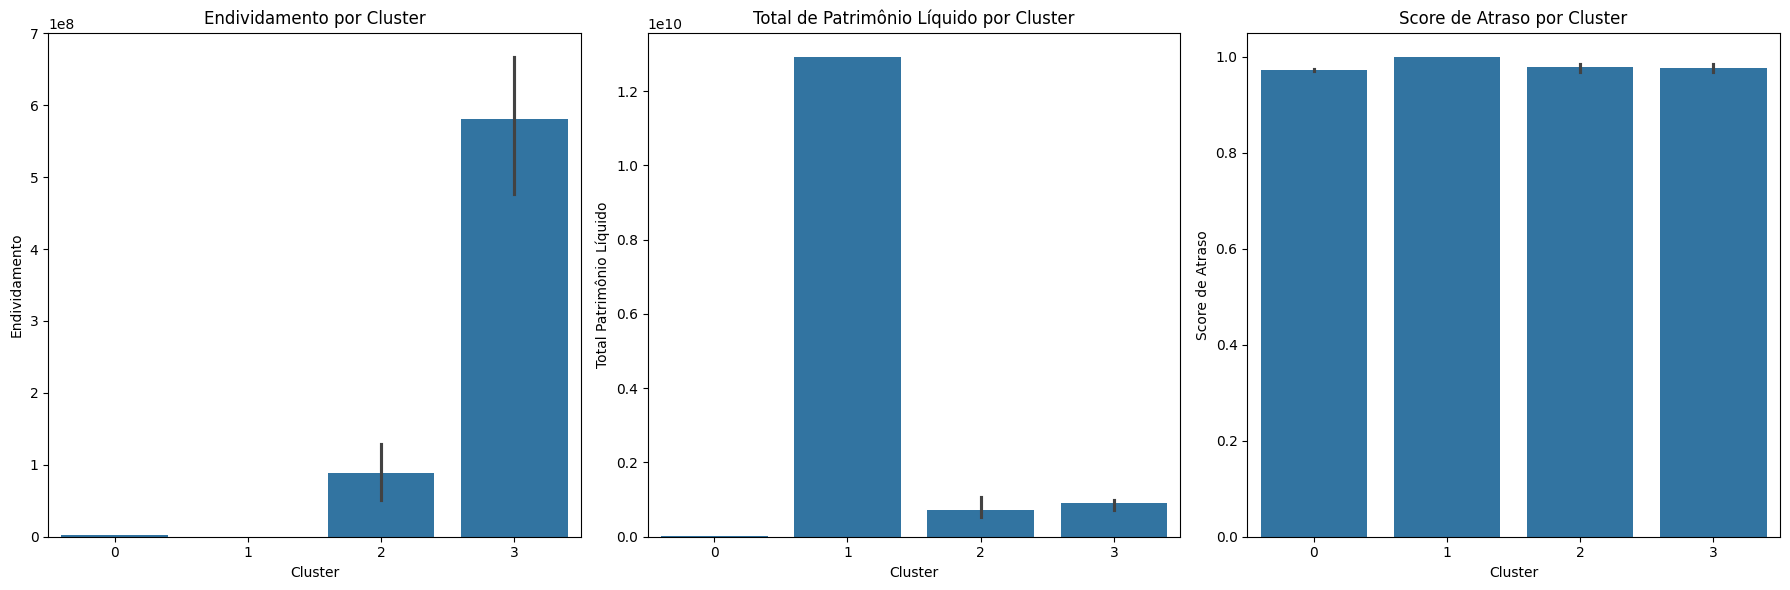

In [85]:


fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de barras para endividamento por cluster
sns.barplot(x='cluster', y='endividamento', data=solicitacoes_credito, ax=axs[0])
axs[0].set_title('Endividamento por Cluster')
axs[0].set_xlabel('Cluster')
axs[0].set_ylabel('Endividamento')

# Gráfico de barras para total de patrimônio líquido por cluster
sns.barplot(x='cluster', y='totalPatrimonioLiquido', data=solicitacoes_credito, ax=axs[1])
axs[1].set_title('Total de Patrimônio Líquido por Cluster')
axs[1].set_xlabel('Cluster')
axs[1].set_ylabel('Total Patrimônio Líquido')

# Gráfico de barras para score de atraso por cluster
sns.barplot(x='cluster', y='score_atraso', data=solicitacoes_credito, ax=axs[2])
axs[2].set_title('Score de Atraso por Cluster')
axs[2].set_xlabel('Cluster')
axs[2].set_ylabel('Score de Atraso')

plt.tight_layout()
plt.show()


In [86]:
# # Filtrar o DataFrame para incluir apenas as informações do cluster 0
# cluster_0 = solicitacoes_credito[solicitacoes_credito['cluster'] == 7]

# # Agrupar pelo campo 'cluster' e calcular a média de 'patrimonio' e 'endividamento'
# media_patrimonio_endividamento = cluster_0.groupby('cluster')[['totalPatrimonioLiquido', 'endividamento']].mean()

# # Definir a largura de cada barra
# largura_barra = 0.35
# clusters = media_patrimonio_endividamento.index

# # Criar subgráficos para patrimônio e endividamento lado a lado
# fig, ax = plt.subplots()

# # Barras para o patrimônio
# ax.bar(clusters - largura_barra/2, media_patrimonio_endividamento['totalPatrimonioLiquido'], width=largura_barra, label='Patrimonio Liquido', edgecolor="white", linewidth=0.7)

# # Barras para o endividamento
# ax.bar(clusters + largura_barra/2, media_patrimonio_endividamento['endividamento'], width=largura_barra, label='Endividamento', edgecolor="white", linewidth=0.7)


# # Configurações do gráfico
# ax.set_xlabel('Clusters')
# ax.set_ylabel('Valores Médios')

# ax.legend()

# # Exibir gráfico
# plt.show()

In [87]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Filtrar o DataFrame para incluir apenas as informações do cluster 0
# cluster_0 = solicitacoes_credito[solicitacoes_credito['cluster'] == 6]

# # Agrupar pelo campo 'cluster' e calcular a média de 'patrimonio', 'endividamento' e 'maiorAtraso'
# media_patrimonio_endividamento = cluster_0.groupby('cluster')[['totalPatrimonioLiquido', 'endividamento', 'maiorAtraso']].mean()

# # Definir a largura de cada barra
# largura_barra = 0.25
# clusters = np.arange(len(media_patrimonio_endividamento.index))  # Gera um array com os índices dos clusters

# # Criar subgráficos para patrimônio, endividamento e maior atraso lado a lado
# fig, ax = plt.subplots()

# # Barras para o patrimônio
# ax.bar(clusters - largura_barra, media_patrimonio_endividamento['totalPatrimonioLiquido'], width=largura_barra, label='Patrimônio Líquido', edgecolor="white", linewidth=0.7)

# # Barras para o endividamento
# ax.bar(clusters, media_patrimonio_endividamento['endividamento'], width=largura_barra, label='Endividamento', edgecolor="white", linewidth=0.7)

# # Barras para o maior atraso
# ax.bar(clusters + largura_barra, media_patrimonio_endividamento['maiorAtraso'], width=largura_barra, label='Maior Atraso', edgecolor="white", linewidth=0.7)

# # Configurações do gráfico
# ax.set_xlabel('Clusters')
# ax.set_ylabel('Valores Médios')
# ax.set_title('Comparação de Patrimônio, Endividamento e Maior Atraso por Cluster')
# ax.legend()

# # Exibir gráfico
# plt.show()


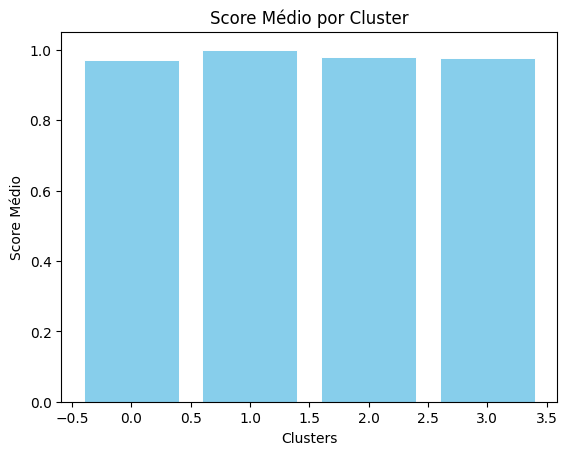

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Agrupar os dados pelo campo 'cluster' e calcular a média do 'score'
score = solicitacoes_credito.groupby('cluster')['score_atraso'].mean()
# score = solicitacoes_credito.groupby('cluster')['score_atraso'].agg(lambda x: x.mode()[0])
# score = solicitacoes_credito.groupby('cluster')['score_atraso'].median()

# Definir os clusters e o score médio
# clusters = media_score.index
# scores_medios = media_score.values

clusters = score.index
scores_medios = score.values

# Criar o gráfico de barras
fig, ax = plt.subplots()

# Barras representando o score médio de cada cluster
ax.bar(clusters, scores_medios, color='skyblue', edgecolor="white", linewidth=0.7)

# Configurações do gráfico
ax.set_xlabel('Clusters')
ax.set_ylabel('Score Médio')
ax.set_title('Score Médio por Cluster')

# Exibir o gráfico
plt.show()


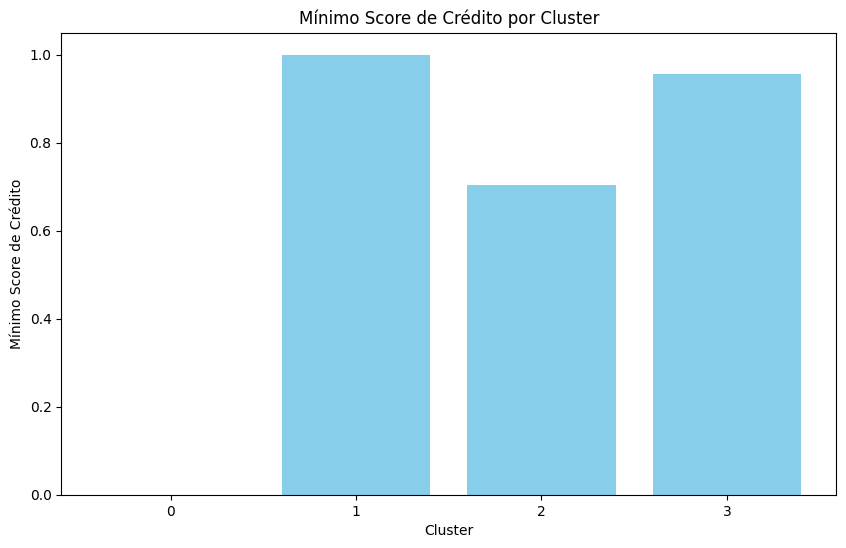

In [89]:
menores_scores = solicitacoes_credito.groupby('cluster')['score_atraso'].min().reset_index(name='min_score')

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(menores_scores['cluster'], menores_scores['min_score'], color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Mínimo Score de Crédito')
plt.title('Mínimo Score de Crédito por Cluster')
plt.xticks(menores_scores['cluster'])
plt.show()


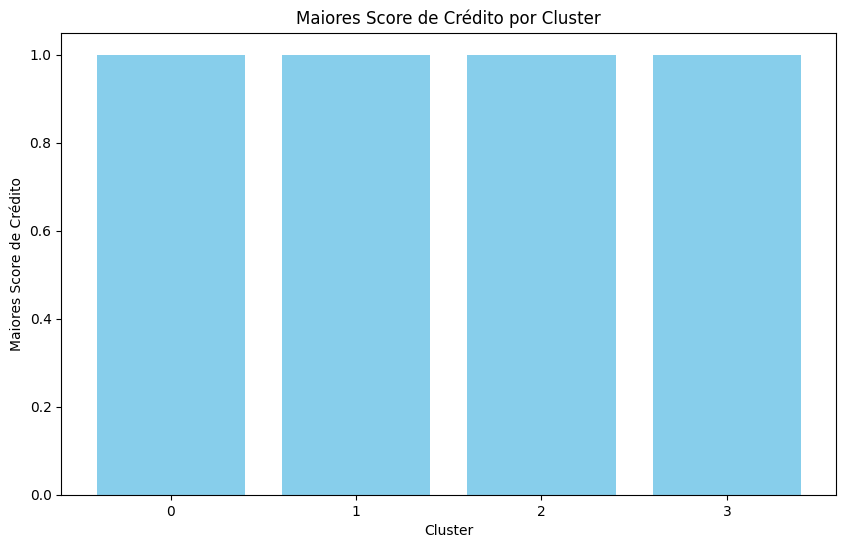

In [90]:
menores_scores = solicitacoes_credito.groupby('cluster')['score_atraso'].max().reset_index(name='max_score')

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(menores_scores['cluster'], menores_scores['max_score'], color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Maiores Score de Crédito')
plt.title('Maiores Score de Crédito por Cluster')
plt.xticks(menores_scores['cluster'])
plt.show()


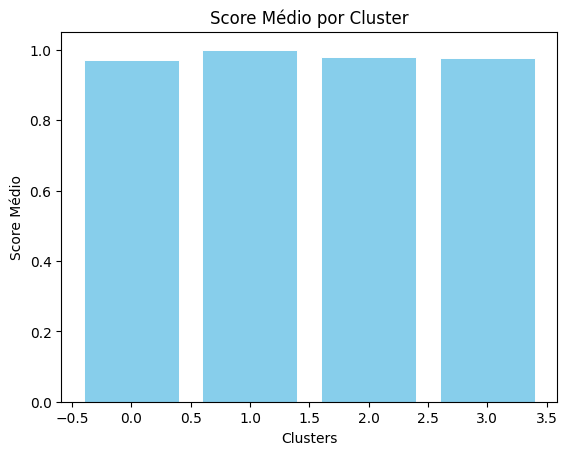

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Agrupar os dados pelo campo 'cluster' e calcular a média do 'score'
score = solicitacoes_credito.groupby('cluster')['score_atraso'].mean()
# score = solicitacoes_credito.groupby('cluster')['score_atraso'].agg(lambda x: x.mode()[0])
# score = solicitacoes_credito.groupby('cluster')['score_atraso'].median()

# Definir os clusters e o score médio
# clusters = media_score.index
# scores_medios = media_score.values

clusters = score.index
scores_medios = score.values

# Criar o gráfico de barras
fig, ax = plt.subplots()

# Barras representando o score médio de cada cluster
ax.bar(clusters, scores_medios, color='skyblue', edgecolor="white", linewidth=0.7)

# Configurações do gráfico
ax.set_xlabel('Clusters')
ax.set_ylabel('Score Médio')
ax.set_title('Score Médio por Cluster')

# Exibir o gráfico
plt.show()


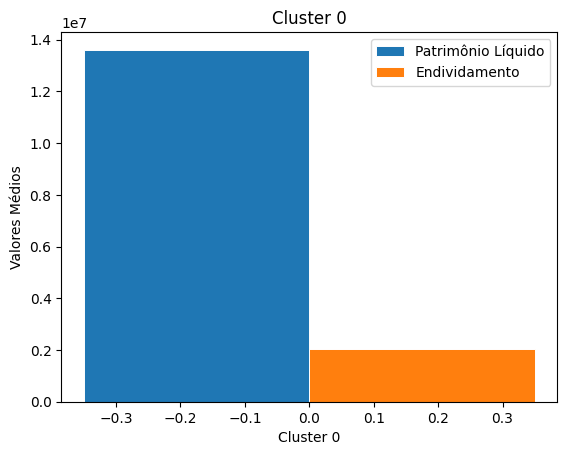

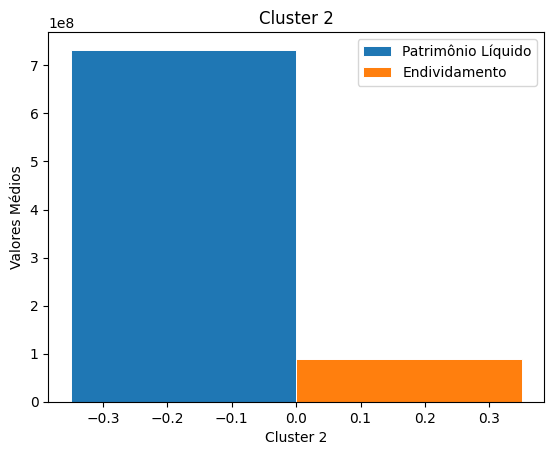

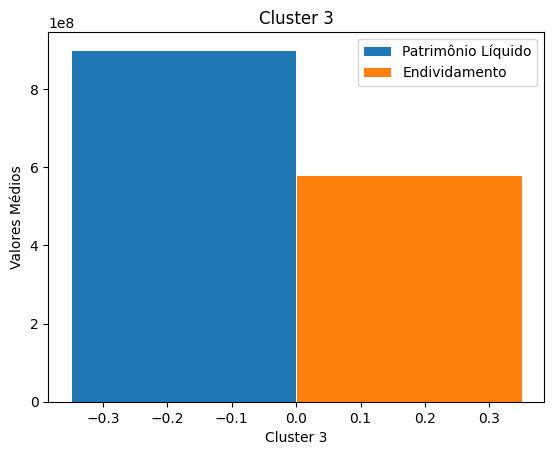

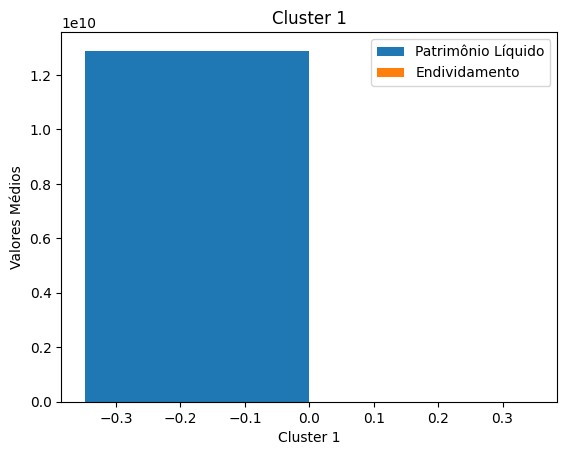

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Listar os clusters únicos presentes no DataFrame
clusters_unicos = solicitacoes_credito['cluster'].unique()

# Definir a largura de cada barra
largura_barra = 0.35

# Loop para gerar o gráfico de cada cluster
for cluster in clusters_unicos:
    # Filtrar o DataFrame para incluir apenas as informações do cluster atual
    cluster_data = solicitacoes_credito[solicitacoes_credito['cluster'] == cluster]
    
    # Agrupar pelo campo 'cluster' e calcular a média de 'patrimonio' e 'endividamento'
    media_patrimonio_endividamento = cluster_data.groupby('cluster')[['totalPatrimonioLiquido', 'endividamento']].mean()
    
    # Criar subgráficos para patrimônio e endividamento lado a lado
    fig, ax = plt.subplots()
    
    # Barras para o patrimônio
    ax.bar(np.arange(len(media_patrimonio_endividamento)) - largura_barra/2, 
           media_patrimonio_endividamento['totalPatrimonioLiquido'], 
           width=largura_barra, 
           label='Patrimônio Líquido', 
           edgecolor="white", 
           linewidth=0.7)
    
    # Barras para o endividamento
    ax.bar(np.arange(len(media_patrimonio_endividamento)) + largura_barra/2, 
           media_patrimonio_endividamento['endividamento'], 
           width=largura_barra, 
           label='Endividamento', 
           edgecolor="white", 
           linewidth=0.7)

    # Configurações do gráfico
    ax.set_xlabel('Cluster {}'.format(cluster))
    ax.set_ylabel('Valores Médios')
    ax.set_title(f'Cluster {cluster}')
    ax.legend()

    # Exibir o gráfico para cada cluster
    plt.show()


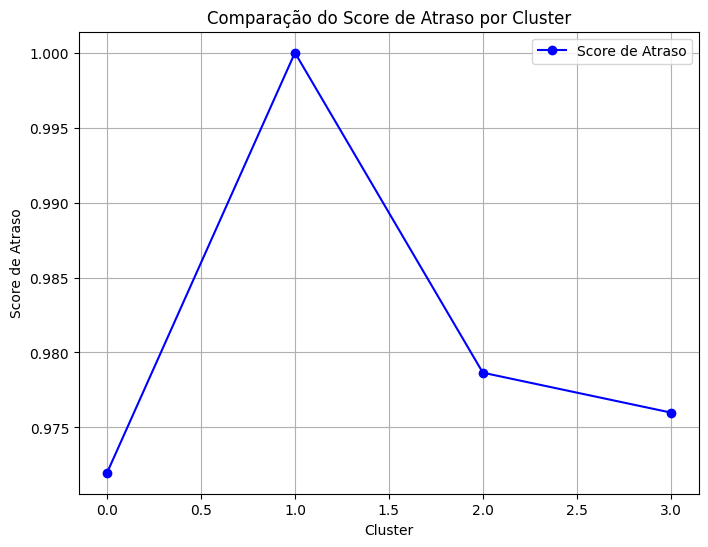

In [93]:

# Extraindo a média do score de atraso por cluster
cluster_scores = solicitacoes_credito.groupby('cluster')['score_atraso'].mean()

# Criar o gráfico de linhas
plt.figure(figsize=(8,6))
plt.plot(cluster_scores.index, cluster_scores, marker='o', color='b', label='Score de Atraso')

# Adicionar títulos e rótulos
plt.title('Comparação do Score de Atraso por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Score de Atraso')
plt.grid(True)
plt.legend()

# Exibir o gráfico
plt.show()

In [94]:
import pickle

# Salvar o modelo
with open('modelo_teste.pkl', 'wb') as file:
    pickle.dump(kmeans, file)


In [95]:
# Tentar carregar o modelo
with open('modelo_teste.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    

In [96]:
from joblib import dump
dump(km, 'saidas/Modelo_Kmeans.joblib')


['saidas/Modelo_Kmeans.joblib']

In [112]:
novos_clientes = pd.read_excel('saidas/novos_clientes.xlsx')

In [113]:
# Certificar-se de que a base de novos clientes tem as colunas necessárias
expected_columns = [
    'maiorAtraso', 'prazoMedioRecebimentoVendas', 'titulosEmAberto',
    'valorSolicitado', 'status', 'valorAprovado', 'periodoBalanco',
    'ativoCirculante', 'passivoCirculante', 'totalAtivo',
    'totalPatrimonioLiquido', 'endividamento', 'duplicatasAReceber',
    'estoque', 'faturamentoBruto', 'margemBruta', 'custos',
    'intervaloFundacao', 'capitalSocial', 'limiteEmpresaAnaliseCredito',
    'score_atraso'
]

In [114]:
# Garantir que todas as colunas esperadas estão presentes
if not set(expected_columns).issubset(novos_clientes.columns):
    raise ValueError("A base de novos clientes não contém todas as colunas esperadas.")

In [115]:
# # Preencher possíveis valores ausentes se necessário (exemplo)
# novos_clientes.fillna(0, inplace=True)  # Ajuste conforme necessário

# # Converter colunas categóricas para numéricas
# # Por exemplo, convertendo a coluna 'status' para numérico
# if 'status' in novos_clientes.columns:
#     novos_clientes['status'] = novos_clientes['status'].apply(lambda x: 1 if x == 'Aprovado' else 0)

# Certificar-se de que os dados são numéricos (convertendo ou tratando se necessário)
novos_clientes[expected_columns] = novos_clientes[expected_columns].apply(pd.to_numeric, errors='coerce')

# Verificar se há valores faltantes e tratá-los (substituindo por 0 ou outro valor)
novos_clientes.fillna(0, inplace=True)

# Selecionar as colunas necessárias para o modelo
X_novos_clientes = novos_clientes[expected_columns].values


In [116]:
# Prever o cluster para cada novo cliente
try:
    clusters_novos_clientes = km.predict(X_novos_clientes)
except Exception as e:
    print(f"Erro ao prever clusters: {e}")
    clusters_novos_clientes = np.full(X_novos_clientes.shape[0], np.nan)  # Usar NaN para falhas



C:\Users\laris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [134]:
# Carregar as solicitações de crédito com os clusters já existentes
solicitacoes_credito = pd.read_pickle('saidas/solicitacoes_credito_clusters.pkl')

# Calcular o limite de crédito com base no score_atraso (ajustando por valorAprovado)
solicitacoes_credito['credit_limit'] = solicitacoes_credito['valorAprovado'] * (solicitacoes_credito['score_atraso'] / solicitacoes_credito['score_atraso'].max())

# Agrupar por cluster para obter o limite médio de crédito por cluster
credit_limits_by_cluster = solicitacoes_credito.groupby('cluster')['credit_limit'].mean().reset_index()

credit_limits_by_cluster.columns = ['cluster', 'recommended_credit_limit']


In [135]:
# Mapear limites de crédito para clusters
credit_limit_map = credit_limits_by_cluster.set_index('cluster')['recommended_credit_limit'].to_dict()

In [141]:
# Adicionar coluna de cluster aos novos clientes
novos_clientes['cluster'] = clusters_novos_clientes

# Adicionar coluna de crédito recomendado baseado no cluster
novos_clientes['credito_recomendado'] = novos_clientes['cluster'].map(credit_limit_map)

# Tratar possíveis NaNs em crédito recomendado (caso o cluster não tenha sido identificado)
novos_clientes['credito_recomendado'].fillna(0, inplace=True)

# Exibir os primeiros registros para verificar
# print(novos_clientes.head())# Adicionar coluna de limite de crédito aos novos clientes

C:\Users\laris\AppData\Local\Temp\ipykernel_13916\3795281521.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  novos_clientes['credito_recomendado'].fillna(0, inplace=True)


In [140]:
novos_clientes.to_excel('saidas/recomendacao.xlsx')

In [121]:
# # Função para recomendar limite de crédito com base no cluster
# def recommend_credit_limit(customer_data, model, credit_limits_by_cluster):
#     # Prever o cluster do cliente
#     cluster = model.predict([customer_data])[0]
    
#     # Encontrar o limite de crédito recomendado para o cluster
#     recommended_limit = credit_limits_by_cluster[credit_limits_by_cluster['cluster'] == cluster]['recommended_credit_limit'].values[0]
    
#     return recommended_limit


In [122]:
# # Exemplo de cliente
# # Observação: customer_data deve ter o mesmo formato e escala das features usadas no treinamento do modelo
# customer_data = {
#     0, #maiorAtraso
#     0, #prazoMedioRecebimentoVendas':
#     0,#titulosEmAberto
#     10000,#valorSolicitado
#     'EmAnaliseDocumentacao', #status
#     0, #valorAprovado
#     '2024-01-31T00:00:00', #PeriodoBalanco
#     100000, #ativoCirculante
#     50000, #passivoCirculante
#     200000, #totalAtivo
#     700000, #totalPatrimonioLiquido
#     10000, #endividamento
#     2000, #duplicatasAReceber
#     3000, #estoque
#     60000, #faturamentoBruto
#     110000, #margemBruto
#     40000, #custos
#     'De 6 a 10 anos', #intervaloFundacao
#     10000, #capitalSocial
#     0, #limiteEmpresaAnaliseCredito
#     1 #score_atraso
# }

# recommended_limit = recommend_credit_limit(customer_data, km, credit_limits_by_cluster)

# print(f"Recommended Credit Limit: {recommended_limit}")

# print("Limites de crédito recomendados por cluster:")
# print(credit_limits_by_cluster)

In [123]:
# # Exemplo de cliente
# # Observação: customer_data deve ter o mesmo formato e escala das features usadas no treinamento do modelo
# customer_data = {
#     'maiorAtraso': 0, 
#     'prazoMedioRecebimentoVendas': 0,
#     'titulosEmAberto': 0,
#     'valorSolicitado': 10000,
#     'status': 4, 
#     'valorAprovado': 0, 
#     'periodoBalanco': 27,
#     'ativoCirculante': 100000, 
#     'passivoCirculante': 50000,
#     'totalAtivo': 200000,
#     'totalPatrimonioLiquido': 700000,
#     'endividamento': 10000,
#     'duplicatasAReceber': 2000,
#     'estoque': 3000,
#     'faturamentoBruto': 60000,
#     'margemBruta': 110000,
#     'custos': 40000,
#     'intervaloFundacao': 3, 
#     'capitalSocial': 10000,
#     'limiteEmpresaAnaliseCredito': 0,
#     'score_atraso': 1
# }

# # A função recommend_credit_limit deve esperar um array/lista com os valores corretos
# # Convertendo customer_data para uma lista com os valores na ordem correta
# customer_data_values = list(customer_data.values())

# # Chamando a função de recomendação
# recommended_limit = recommend_credit_limit(customer_data_values, km, credit_limits_by_cluster)

# print(f"Recommended Credit Limit: {recommended_limit}")

# print("Limites de crédito recomendados por cluster:")
# credit_limits_by_cluster
